/home/andreasstillits/coding/Leaves1D/supplementary


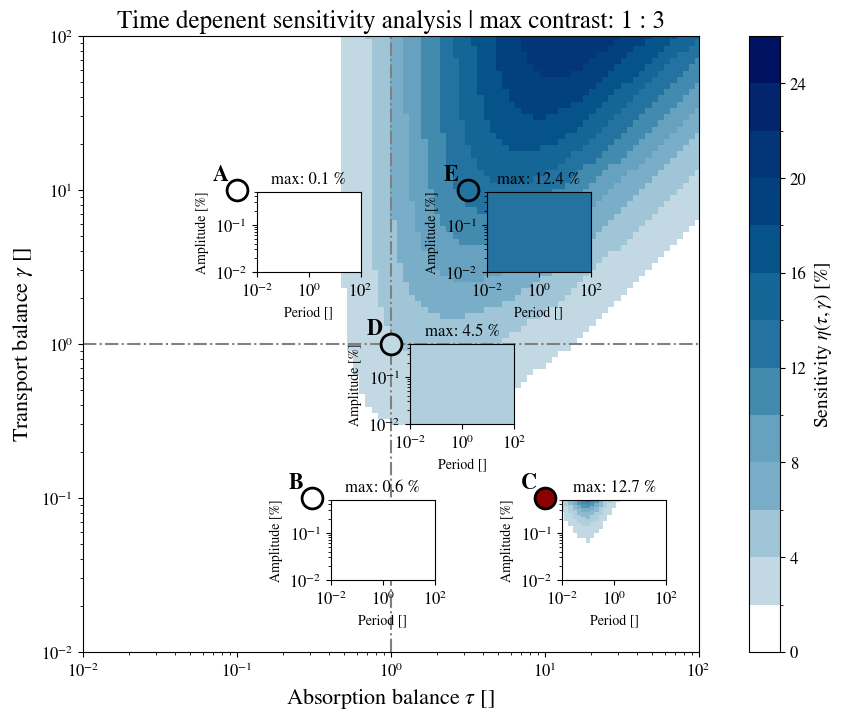

In [19]:
%cd /home/andreasstillits/coding/Leaves1D/supplementary

from codebase.utils.plotfunctions import plot_sensitivity_map , plot_temporal_scan, get_blue_cmap
from codebase.utils.constants import Cases
from matplotlib import pyplot as plt

def create_transient_sensitivity_figure(filename: str = "files/plots/transient_sensitivity.svg", rhomax: float = 0.2):
    """Create figure for transient sensitivity analysis"""
    fig, ax = plt.subplots(figsize=(13, 8))
    im = plot_sensitivity_map("files/nonlinear_sensitivities/sensitivities_mu0.00_.txt", ax=ax)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(r'Sensitivity $\eta(\tau, \gamma)$ [%]')
    ax.set_xlabel(r'Absorption balance $\tau$ []', fontsize=16)
    ax.set_ylabel(r'Transport balance $\gamma$ []', fontsize=16)
    ax.set_title(f"Time depenent sensitivity analysis | max contrast: 1 : {1/rhomax:.0f}", fontsize=18)
    # place circles for cases A - E
    cases = Cases()
    labels = ["A", "B", "C", "D", "E"]
    circles = []
    for label in labels:
        tau, gamma, chi_ = cases.get_case_params(label)
        circles.append((tau, gamma))
    # plot circles
    cmap, norm = get_blue_cmap((0, 26, 14))
    colors = ['white', 'white', 'darkred', cmap(norm(3)), cmap(norm(12))]
    for label, color, (tau, gamma) in zip(labels, colors, circles):
        ax.plot(tau, gamma, marker='o', markersize=15, markeredgecolor='black', markeredgewidth=2, markerfacecolor=color)
        ax.text(tau*0.70, gamma*1.15, label, color='black', fontsize=16, fontweight='bold')

    # make inset plots
    def _make_inset(case: str, rect: list[float]) -> None:
        inset_ax = fig.add_axes(rect)
        max_sens = plot_temporal_scan("gs", case, rhomax, ax=inset_ax)
        inset_ax.set_title(f"max: {100*max_sens:.1f} %", fontsize=12)
        inset_ax.set_xlabel("Period []", fontsize=10)
        inset_ax.set_ylabel("Amplitude [%]", fontsize=10)
        
    _make_inset("A", [0.405, 0.585, 0.08, 0.1])
    _make_inset("B", [0.462, 0.200, 0.08, 0.1])
    _make_inset("C", [0.640, 0.200, 0.08, 0.1])
    _make_inset("D", [0.523, 0.395, 0.08, 0.1])
    _make_inset("E", [0.582, 0.585, 0.08, 0.1])

    # save
    plt.savefig(filename)
    plt.show()

create_transient_sensitivity_figure(rhomax=0.3)

/home/andreasstillits/coding/Leaves1D/supplementary


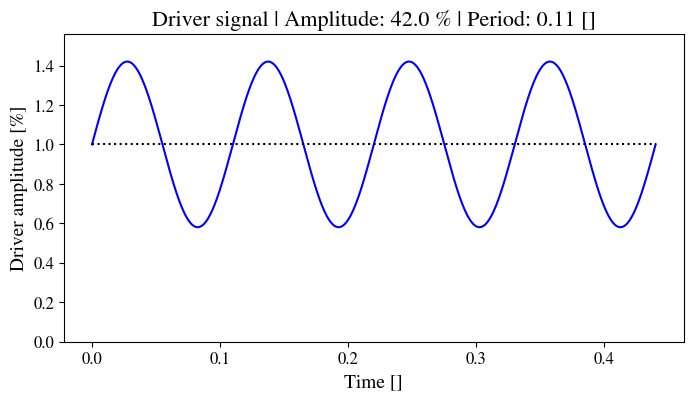

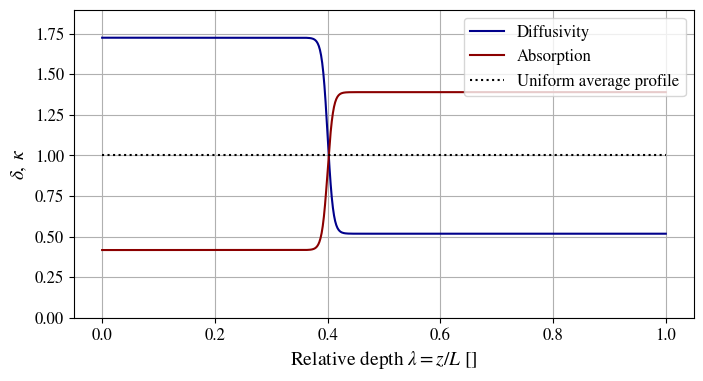

In [9]:
%cd /home/andreasstillits/coding/Leaves1D/supplementary

from codebase.utils.constants import TemporalExploration
from codebase.utils.profiles import StepProfile, OscillatorProfile 
from matplotlib import pyplot as plt
import numpy as np 

constants = TemporalExploration()

def show_driver(amp: float, period: float, times: np.ndarray | None = None, ns: int = 4, ax: plt.Axes | None = None) -> None: 
    """Show driver signal for given amplitude and period"""
    if ax is None:
        fig, ax_ = plt.subplots(figsize=(8, 4))
    else:
        ax_ = ax
    profile = OscillatorProfile(amplitude=amp, period=period)
    if times is None:
        times = np.linspace(0, ns*period, 1000)
    ax_.plot(times, profile.generalize()(0, times), color='blue')
    ax_.hlines(1, 0, ns*period, colors="black", linestyles=":")
    ax_.set_ylim(0, 1.1*(1+amp))
    ax_.set_xlabel("Time []", fontsize=14)
    ax_.set_ylabel("Driver amplitude [%]", fontsize=14)
    ax_.set_title(f"Driver signal | Amplitude: {amp*100:.1f} % | Period: {period:.2f} []", fontsize=16)
    if ax is None:
        plt.show()

def show_step_profiles(rhomax: float, rho_lambda: float = 0.6, ax: plt.Axes | None = None) -> None: 
    """Show step profiles for given rho_max and rho_lambda"""
    if ax is None:
        fig, ax_ = plt.subplots(figsize=(8, 4))
    else:
        ax_ = ax
    delta = StepProfile(direction="down")
    delta.populate_rho(rhomax, rho_lambda)
    delta = delta.steadify()
    #
    kappa = StepProfile(direction="up")
    kappa.populate_rho(rhomax, rho_lambda)
    kappa = kappa.steadify()
    #
    x = np.linspace(0, 1, 1000)
    ax_.plot(x, delta(x), label="Diffusivity", color="darkblue")
    ax_.plot(x, kappa(x), label="Absorption", color="darkred")
    ax_.hlines(1, 0, 1, colors="black", linestyles=":", label="Uniform average profile")
    ax_.set_ylim(0, 1.1*np.max([np.max(delta(x)), np.max(kappa(x))]))
    ax_.set_xlabel(r"Relative depth $\lambda = z/L$ []", fontsize=14)
    ax_.set_ylabel(r"$\delta, \; \kappa$", fontsize=14)
    ax_.grid()
    if ax is None:
        ax_.legend(loc="upper right", fontsize=12)
        plt.show()

amp = 0.42
per = 0.11
rhomax = 0.3

show_driver(amp, per)
show_step_profiles(rhomax)